# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import random


## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
expon_rv = sts.expon()
sample_e = expon_rv.rvs(100)
print(sample_e)
len(sample_e)

[1.25583346e+00 3.74826067e-01 8.25343038e-02 2.93368713e-02
 6.27587097e-01 2.13793106e+00 3.73713416e-02 4.02048728e-01
 2.43873740e-01 6.38411240e-01 3.05606540e-01 7.01845520e-02
 9.21564168e-01 9.27494696e-01 2.32374240e+00 2.32490791e-01
 5.99602964e-01 2.27457276e-01 1.18091431e-01 2.44642656e+00
 1.39249292e+00 2.47299809e-01 4.63055824e-02 2.12474419e-02
 1.29900140e-01 2.01545487e-01 1.06307796e+00 4.40158979e+00
 8.45623253e-01 8.39020262e-01 2.67757112e-01 2.54699231e+00
 2.05531383e-01 1.33586213e-01 5.77944987e-01 4.06809625e-01
 3.80377685e-01 1.56965237e+00 1.31780335e+00 7.10130700e-01
 1.17980936e+00 5.24841842e-01 5.22376888e-01 1.28424848e+00
 2.99907528e-01 1.76646233e+00 7.74257443e-01 1.06247286e-01
 6.67398342e-01 9.25272173e-01 2.08022022e-01 6.77526159e-01
 4.03834986e-02 1.55530656e+00 2.11569486e+00 1.64612302e+00
 4.42838883e-01 1.96341895e-03 4.58055456e-01 9.69925688e-01
 3.21931016e-01 2.26674605e+00 4.80116125e-01 2.29123240e-03
 1.29182649e-01 4.546769

100

In [3]:
sample_e.dtype

dtype('float64')

In [4]:
real_mean_e = expon_rv.mean() # настоящее среднее случайной величины
real_mean_e

1.0

In [5]:
real_var_e = expon_rv.var() # настоящая дисперсия случайной величины
real_var_e

1.0

### Постройте гистограмму выборки и теоретическую плотность распределения

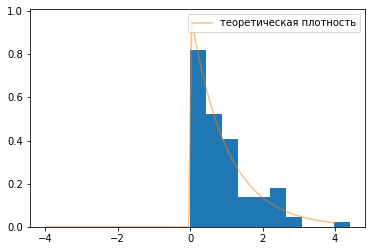

In [6]:
# ваш код тут
plt.hist(sample_e , density=True)
x = np.linspace(-4,4,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample_e.mean() # выборочное среднее
print(sample_mean)
sample_var = sample_e.var() # выборочная дисперсия
print(sample_var)
sample_std = sample_e.std() # выборочное стандартное отклонение
print(sample_std)

0.9218086942056971
0.7167320724758443
0.846600302666993


In [8]:
N = 1000
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))

In [31]:
means=np.array(means)


In [19]:
norm_rv=sts.norm(means.mean(),means.std())

In [20]:
x = np.linspace(0.9,1.1, 100)

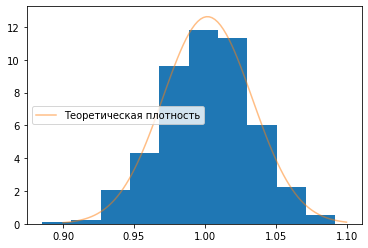

In [22]:
plt.hist(means, density=True)
pdf = norm_rv.pdf(x)
plt.plot(x,pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [36]:
x = np.linspace(0.25,1.85, 1000)

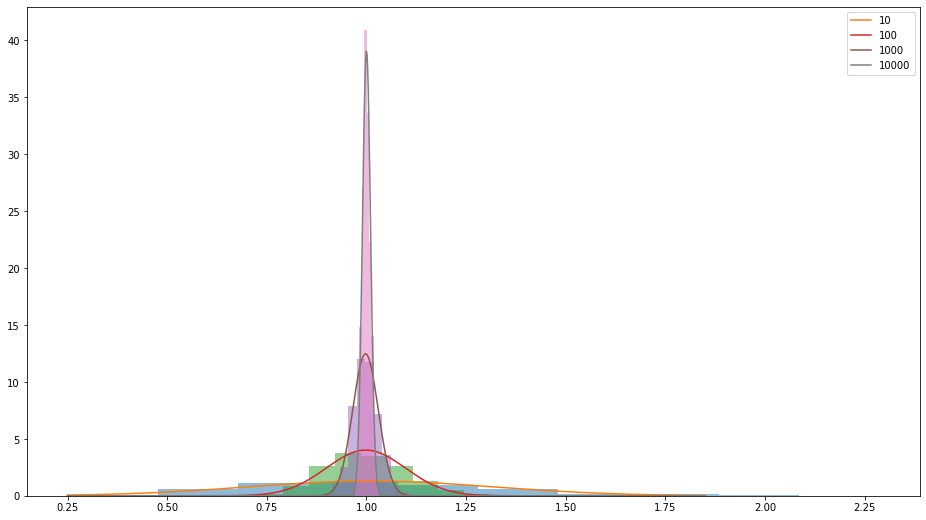

In [37]:
# ваш код тут
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    
    for i in range(1000):
        means.append(np.mean(expon_rv.rvs(N)))
    means=np.array(means)
    plt.hist(means, density=True,alpha=0.5)
    norm_rv=sts.norm(means.mean(),means.std())
    pdf = norm_rv.pdf(x)
    plt.plot(x,pdf, label='Теоретическая плотность')

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
#Для выбранного распределения f(x)=exp(-x) аппроксимация выборочного среднего работает хорошо. При генераций выборочных
# средних  при разных N(количестве элементов в выборке) мы получаем нормальное распределение,
#что проиллюстрировано на графике выше.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
#число степеней свободы=1. Рассчитать дисперсию для оценки  z  интервала.

In [22]:
df = pd.read_csv('telecom_churn.csv',  sep=',')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
df1=df[['total day calls','churn']]
df1.head()

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False


In [ ]:
#I.I
#Построим доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему 
# колонке churn (False)

In [24]:
df_False=df1[df1.churn==False]
df_False=df_False['total day calls']
print(df_False.head())
len(df_False)

0    110
1    123
2    114
3     71
4    113
Name: total day calls, dtype: int64


2850

In [25]:
print(df_False.mean(),df_False.std(),df_False.var(ddof=1))

100.28315789473685 19.801156951805503 392.08581663003537


In [26]:
df_False=np.array(df_False)
df_False

array([110, 123, 114, ..., 109, 105, 113], dtype=int64)

In [71]:
#I способ расчета
#Рассчитаем  доверительные интервалы для среднего значения по явной формуле. Пусть в эксперементе приняло участие  
#N наблюдений, выбранные случайным образом из  df_False,где  N <=числа элементов  df_False
mu =df_False.mean()
sigma = df_False.std(ddof=1)
norm_rv = sts.norm(mu, sigma)
N = [10, 50, 100, 1000] # N наблюдений, выбранные случайным образом из  df_False
alpha = 0.05
for n in N:
    samples = np.random.choice(df_False,n,replace=False) # выбор случайным обр . N <=числа элементов  df_False (replace=False)
    pdf = norm_rv.pdf(samples)                            
    se=sigma/math.sqrt(n) #для построения 95% доверительного интервала  рассчитаем стандартную ошибку среднего
    print("Для N= %.f ДИ %.4f ... %.4f" % (n,samples.mean() - 1.96*se , samples.mean() + 1.96*se ))

Для N= 10 ДИ 94.0271 ... 118.5729
Для N= 50 ДИ 97.8514 ... 108.8286
Для N= 100 ДИ 97.7490 ... 105.5110
Для N= 1000 ДИ 98.2457 ... 100.7003


100.0271157702604 124.5728842297396


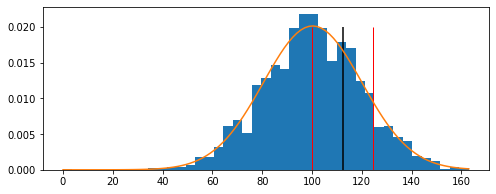

In [41]:
#II способ расчета c построением доверительных интервалов для среднего значения total day calls
#Рассчитаем  доверительный интервал для среднего значения total day calls по явной формуле. Пусть в эксперементе приняло участие  
#N наблюдений, выбранные случайным образом из  df_False,где  N <=числа элементов  df_False

plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_False),np.max(df_False),100)
plt.plot(x,norm_rv.pdf(x))
N = [10]

for n in N:
    samples = np.random.choice(df_False,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

92.41139931646342 103.3886006835366


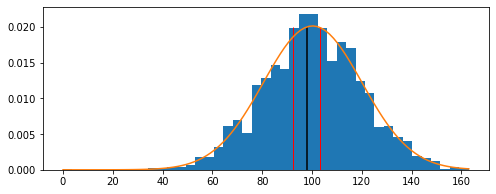

In [42]:
plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_False),np.max(df_False),100)
plt.plot(x,norm_rv.pdf(x))
N = [50]

for n in N:
    samples = np.random.choice(df_False,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

98.08897323744617 105.85102676255383


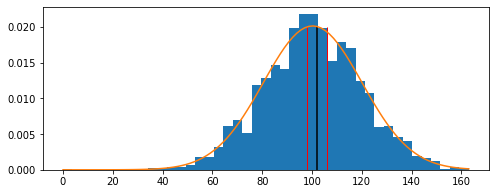

In [43]:
plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_False),np.max(df_False),100)
plt.plot(x,norm_rv.pdf(x))
N = [100]

for n in N:
    samples = np.random.choice(df_False,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

98.62631474008593 101.30168525991407


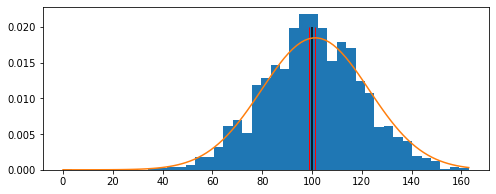

In [69]:
plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_False),np.max(df_False),100)
plt.plot(x,norm_rv.pdf(x))
N = [1000]

for n in N:
    samples = np.random.choice(df_False,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

In [ ]:
#I.II
#Построим доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему 
# колонке churn (True)

In [54]:
df_True=df1[df1.churn==True]
df_True=df_True['total day calls']
print(df_True.head())
len(df_True)

10    137
15     67
21     89
33    118
41     85
Name: total day calls, dtype: int64


483

In [51]:
print(df_True.mean(),df_True.std(),df_True.var(ddof=1))

101.33540372670808 21.58230721307551 465.79598463957115


In [52]:
df_True=np.array(df_False)
df_True

array([110, 123, 114, ..., 109, 105, 113], dtype=int64)

In [71]:
#I способ расчета
#Рассчитаем  доверительные интервалы для среднего значения по явной формуле. Пусть в эксперементе приняло участие  
#N наблюдений, выбранные случайным образом из  df_True
mu =df_True.mean()
sigma = df_True.std(ddof=1)
norm_rv = sts.norm(mu, sigma)
N = [10, 50, 100, 400] # N наблюдений, выбранные случайным образом из  df_True
alpha = 0.05
for n in N:
    samples = np.random.choice(df_True,n,replace=False) # выбор случайным обр . N <=числа элементов  df_True
    pdf = norm_rv.pdf(samples)                            
    se=sigma/sqrt(n) #для построения 95% доверительного интервала  рассчитаем стандартную ошибку среднего
    print("Для N= %.f ДИ %.4f ... %.4f" % (n,samples.mean() - 1.96*se , samples.mean() + 1.96*se ))

Для N= 10 ДИ 93.9231 ... 120.6769
Для N= 50 ДИ 95.6377 ... 107.6023
Для N= 100 ДИ 98.8699 ... 107.3301
Для N= 400 ДИ 99.7474 ... 103.9776


88.72314740085929 115.4768525991407


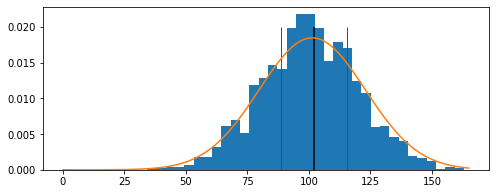

In [58]:
#II способ расчета c построением доверительных интервалов для среднего значения total day calls
#Рассчитаем  доверительный интервал для среднего значения total day calls по явной формуле. Пусть в эксперементе приняло участие  
#N наблюдений, выбранные случайным образом из  df_True,где  N <=числа элементов  df_True

plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_True),np.max(df_True),100)
plt.plot(x,norm_rv.pdf(x))
N = [10]

for n in N:
    samples = np.random.choice(df_True,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

93.27768965266533 105.24231034733468


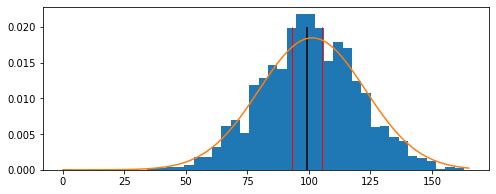

In [72]:
plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_True),np.max(df_True),100)
plt.plot(x,norm_rv.pdf(x))
N = [50]

for n in N:
    samples = np.random.choice(df_True,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

98.4498677862372 106.91013221376281


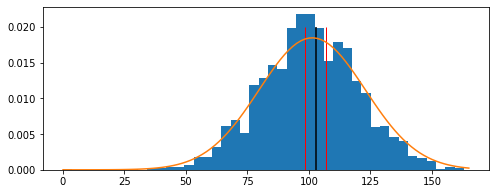

In [73]:
plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_True),np.max(df_True),100)
plt.plot(x,norm_rv.pdf(x))
N = [100]

for n in N:
    samples = np.random.choice(df_True,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

99.7249338931186 103.9550661068814


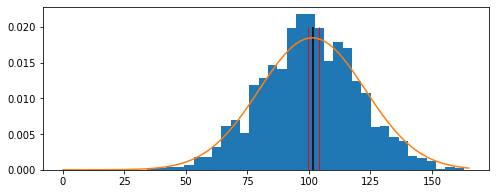

In [74]:
plt.figure(figsize=(8, 3))
plt.hist(df_False, density=True, bins='auto')
x=np.linspace(np.min(df_True),np.max(df_True),100)
plt.plot(x,norm_rv.pdf(x))
N = [400]

for n in N:
    samples = np.random.choice(df_True,n,replace=False)
    plt.vlines(samples.mean(),0,0.02)
    se=sigma/sqrt(n)
    xl=samples.mean() - 1.96*se
    xr=samples.mean() + 1.96*se 
    print(xl,xr) 
    plt.vlines(xl, 0, 0.02, color='r', lw=1)
    plt.vlines(xr,0, 0.02, color='r', lw=1)

In [ ]:
#Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
#from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

In [ ]:
II. Сделаем оценку с использованием явной формулы для z интервала z=(x_b-mu)/sigma  


In [ ]:
#II.I  Для df_False
z=(x_b_sr-df_False.mean())/df_False.std
x_b_r=df_False.mean()+z*df_False.std
x_b_l=df_False.mean()-z*df_False.std

In [91]:
df_False=df1[df1.churn==False]
df_False=df_False['total day calls']
print(df_False.head())
len(df_False)

0    110
1    123
2    114
3     71
4    113
Name: total day calls, dtype: int64


2850

In [92]:
print(df_False.mean(),df_False.std(),df_False.var(ddof=1))

100.28315789473685 19.801156951805503 392.08581663003537


In [108]:
x_b_r=1.96*df_False.std()+df_False.mean()
round(x_b_r,2)

139.09

In [109]:
x_b_l=-1.96*df_False.std()+df_False.mean()
round(x_b_l,2)

61.47

In [ ]:
#Сделаем оценку  для z интервала  с помощью функций 
#from statsmodels.stats.weightstats import _zconfint_generic

In [96]:
from statsmodels.stats.weightstats import _zconfint_generic

In [97]:
_zconfint_generic(df_False.mean(),df_False.std(),0.05,alternative="two-sided")

(61.47360341697314, 139.09271237250056)

In [ ]:
#II.II  Для df_True

In [102]:
df_True=df1[df1.churn==True]
df_True=df_True['total day calls']
print(df_True.head())
len(df_True)

10    137
15     67
21     89
33    118
41     85
Name: total day calls, dtype: int64


483

In [103]:
print(df_True.mean(),df_True.std(),df_True.var(ddof=1))

101.33540372670808 21.58230721307551 465.79598463957115


In [110]:
x_b_r=1.96*df_True.std()+df_True.mean()
round(x_b_r,2)

143.64

In [111]:
x_b_l=-1.96*df_True.std()+df_True.mean()
round(x_b_l,2)

59.03

In [ ]:
#Сделаем оценку для z интервала  с помощью функций 
#from statsmodels.stats.weightstats import _zconfint_generic

In [106]:
from statsmodels.stats.weightstats import _zconfint_generic

In [107]:
_zconfint_generic(df_True.mean(),df_True.std(),0.05,alternative="two-sided")

(59.03485888580106, 143.63594856761512)

In [ ]:
# Вывод: Данные  z интервала, расчитанные  с использованием явной формулы для z интервала и с помощью функций
#from statsmodels.stats.weightstats import _zconfint_generic совпадают. 